# Data Visualization

This part we will continue doing data exploration on Melbourne Housing dataset. 

First, let's import packages, load dataset and complete data cleaning as we did last time.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as ny
import seaborn as sns

#load dataset
housing = pd.read_csv('housing.csv')
#filter rows whose buildingarea is zero
housing = housing[housing['BuildingArea']!=0]
#drop three columns
housing = housing.drop(['Address','SellerG','Bedroom2'],axis = 1) 
#get age of property
housing['Age'] = 2018-housing['YearBuilt']
#filter one 420-year-old property 
housing = housing[housing['Age']<500]
#extract Year, Month, Day from Date. First, you have to change string into datetime object
housing['Date']=pd.to_datetime(housing['Date'],infer_datetime_format=True)  ## transform Date column to datetime object
housing['Year']=pd.DatetimeIndex(housing['Date']).year
housing['Month']=pd.DatetimeIndex(housing['Date']).month
housing['Weekday']=pd.DatetimeIndex(housing['Date']).weekday
#finally, drop all NAN
housing=housing.dropna()
#Take a look!
housing.head()


,Suburb,Rooms,Type,Price,Method,Date,Distance,Postcode,Bathroom,Car,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Year,Month,Weekday
2,Abbotsford,2,h,1035000.0,S,2016-04-02,2.5,3067.0,1.0,0.0,...,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,118.0,2016,4,5
4,Abbotsford,3,h,1465000.0,SP,2017-04-03,2.5,3067.0,2.0,0.0,...,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,118.0,2017,4,0
6,Abbotsford,4,h,1600000.0,VB,2016-04-06,2.5,3067.0,1.0,2.0,...,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,4.0,2016,4,2
11,Abbotsford,3,h,1876000.0,S,2016-07-05,2.5,3067.0,2.0,0.0,...,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0,108.0,2016,7,1
14,Abbotsford,2,h,1636000.0,S,2016-08-10,2.5,3067.0,1.0,2.0,...,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0,128.0,2016,8,2


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8841 entries, 2 to 34856
Data columns (total 22 columns):
Suburb           8841 non-null object
Rooms            8841 non-null int64
Type             8841 non-null object
Price            8841 non-null float64
Method           8841 non-null object
Date             8841 non-null datetime64[ns]
Distance         8841 non-null float64
Postcode         8841 non-null float64
Bathroom         8841 non-null float64
Car              8841 non-null float64
Landsize         8841 non-null float64
BuildingArea     8841 non-null float64
YearBuilt        8841 non-null float64
CouncilArea      8841 non-null object
Lattitude        8841 non-null float64
Longtitude       8841 non-null float64
Regionname       8841 non-null object
Propertycount    8841 non-null float64
Age              8841 non-null float64
Year             8841 non-null int64
Month            8841 non-null int64
Weekday          8841 non-null int64
dtypes: datetime64[ns](1), float64(12), 

Let us rescale price column in to Price(k)

In [11]:
housing['Price(K)'] = housing['Price']/1000
housing.drop('Price',axis = 1,inplace=True) 

** Dataset is ready for visualize. **

### Show, don't tell!

## Viz 1

This plot will show the distribution of Price(K)

(0, 8000)

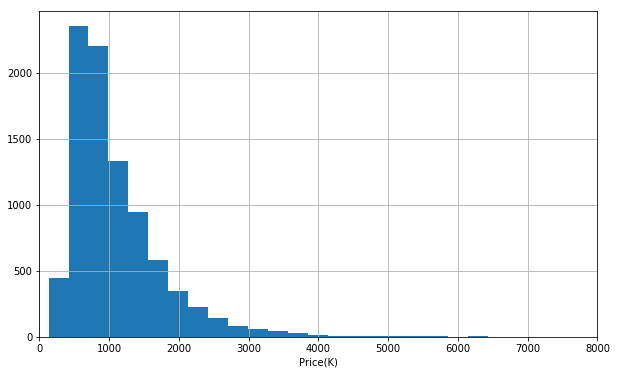

In [46]:
plt.figure(figsize=(10,6))
ax1=housing['Price(K)'].hist(bins=31)
ax1.set_xlabel('Price(K)')
ax1.set_xlim([0,8000])

## Viz 2

Price(K) VS Age of Property

Text(0,0.5,'Price(K)')

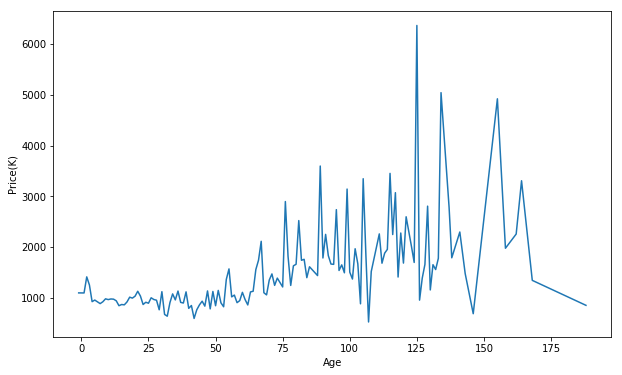

In [26]:
plt.figure(figsize=(10,6))
ax2=housing.groupby('Age')['Price(K)'].mean().plot()
ax2.set_ylabel('Price(K)')

It is kind of time series data. The price shivers within age. However, we can still infer that the older the property is, the more expensive is if the age is lower than 125. The property older thatn 130 seems to be as expensive as the ones 50 years old.

## Viz 3

Price(K) VS Year, Month, and Weekday

Text(0.5,1,'Price(K) VS Year')

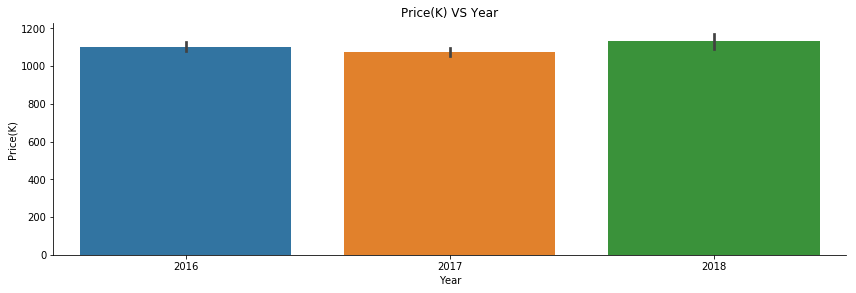

In [60]:
plt.figure(figsize=(10,6))
g1=sns.factorplot(y='Price(K)',x='Year',kind='bar',size=4, aspect =3,data=housing)
g1.ax.set_title('Price(K) VS Year')

Text(0.5,1,'Price(K) VS Month')

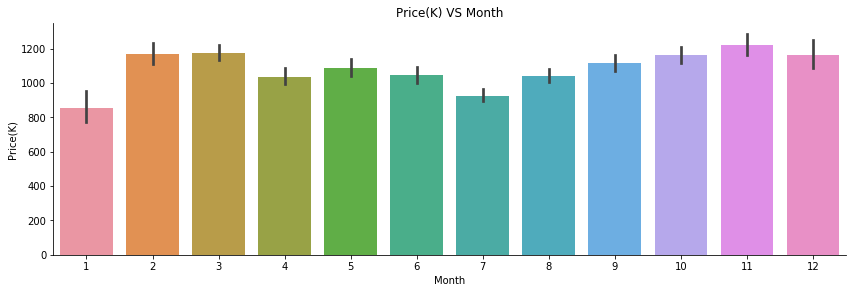

In [59]:
plt.figure(figsize=(10,6))
g2=sns.factorplot(y='Price(K)',x='Month',kind='bar',size=4, aspect =3,data=housing)
g2.ax.set_title('Price(K) VS Month')

Text(0.5,1,'Price(K) VS Week of Day')

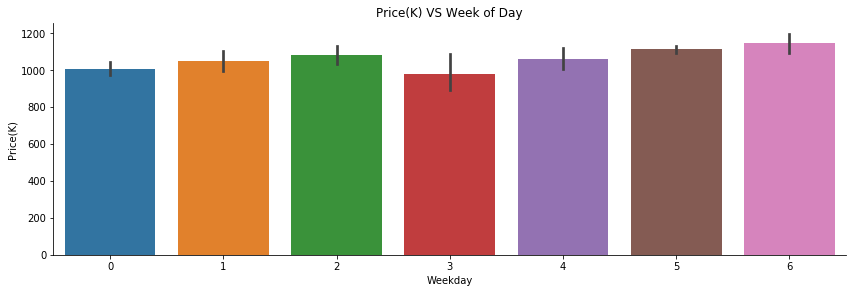

In [58]:
plt.figure(figsize=(10,6))
g3=sns.factorplot(y='Price(K)',x='Weekday',kind='bar',size=4, aspect =3,data=housing)
g3.ax.set_title('Price(K) VS Week of Day')

Text(0.5,1,'Price(K) VS Month')

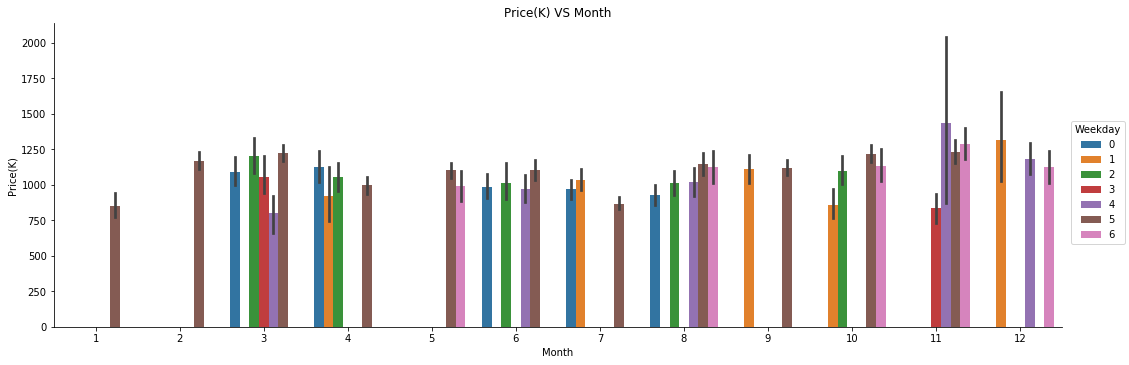

In [54]:
plt.figure(figsize=(16,6))
g4=sns.factorplot(y='Price(K)',x='Month',kind='bar',hue='Weekday',size=5, aspect =3,data=housing)
g4.ax.set_title('Price(K) VS Month')

## Viz 4

Price(K) VS Distance

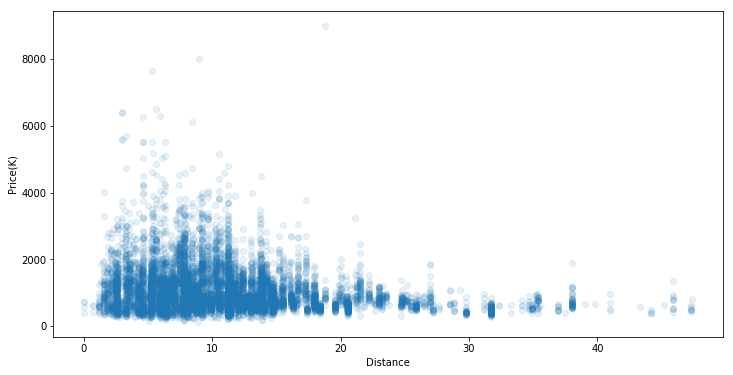

In [69]:
plt.figure(figsize=(12,6))
sns.regplot(x='Distance',y='Price(K)',data=housing,scatter_kws={'alpha':0.1},fit_reg=False)

From this plot, we can two main insights:

- Most of properties have distance from 2ish to 15ish unit(miles/kms)
- The further the property is from the CBD, the less value the property has

This justifies the comman sense of the expensive properties in Melbourne CBD. Actually this rule applies to any big city!

## Viz 5

Price(K) VS Number of Rooms

Text(0.5,1,'Price(K) VS Number of Rooms')

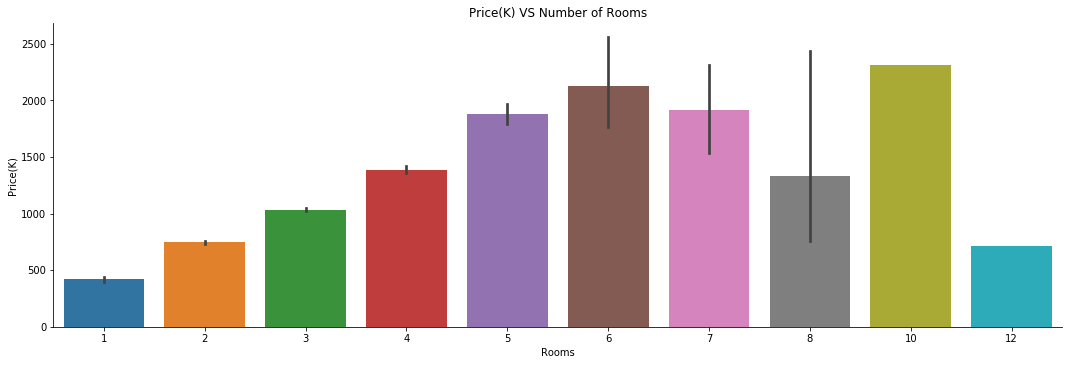

In [70]:
g5=sns.factorplot(y='Price(K)',x='Rooms',kind='bar',size=5, aspect =3,data=housing)
g5.ax.set_title('Price(K) VS Number of Rooms')

Actually, we can guess that the more room one property has, the bigger the property is. SO.....Let's Viz6

## Viz6

Price(K) VS Buildingarea

Text(0.5,1,'Price(k) VS BuildingArea')

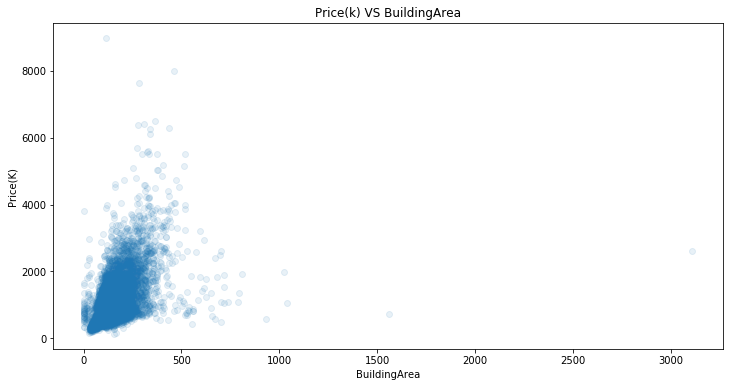

In [77]:
plt.figure(figsize=(12,6))
ax3=sns.regplot(x='BuildingArea',y='Price(K)',data=housing,scatter_kws={'alpha':0.1},fit_reg=False)
ax3.set_title('Price(k) VS BuildingArea')

Let's take a closer look at x:(0,1000) part. In other words, ignore outliers.

Text(0.5,1,'Price(K) VS BuildingArea(0-1100)')

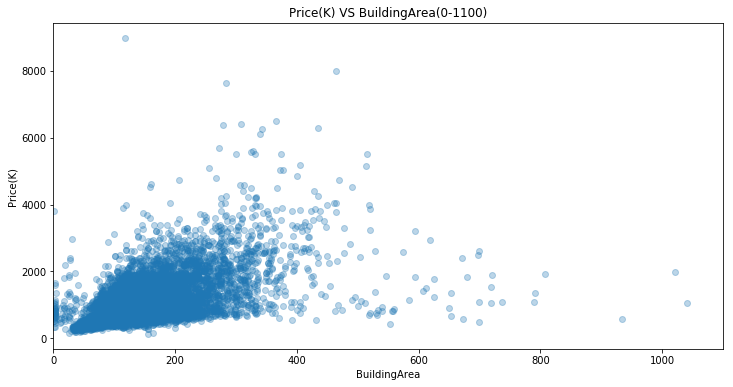

In [80]:
plt.figure(figsize=(12,6))
ax4=sns.regplot(x='BuildingArea',y='Price(K)',data=housing,scatter_kws={'alpha':0.3},fit_reg=False)
ax4.set_xlim((0,1100))
ax4.set_title('Price(K) VS BuildingArea(0-1100)')

For buildingarea ranging from 0 and 400, it seems to be a positive linear trend. It is not clear due to too many overlapping points.

## Viz 7

Price VS Region Name

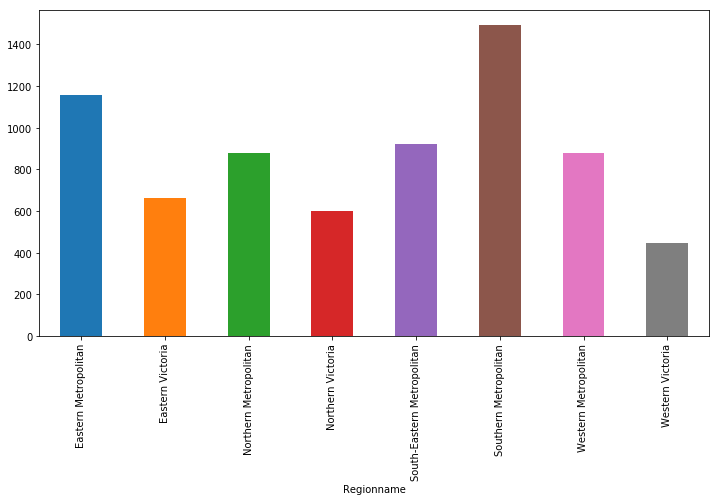

In [87]:
plt.figure(figsize=(12,6))
housing.groupby('Regionname')['Price(K)'].mean().plot(kind='bar')